In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import numpy as np

# visualization

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px


# PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

import sys
!{sys.executable} -m pip install git+https://github.com/el-hult/pyppca
from pyppca import ppca

# KMeans

from sklearn.cluster import KMeans


%matplotlib inline

drive.mount('/content/drive')

  Cloning https://github.com/el-hult/pyppca to /tmp/pip-req-build-n7y2iu52
  Running command git clone -q https://github.com/el-hult/pyppca /tmp/pip-req-build-n7y2iu52
  Created wheel for pyppca: filename=pyppca-0.0.5-cp36-none-any.whl size=5117 sha256=2aa70928eea0eebe6db40534bdda38e19eb3b51f9c5de042a7cd03202dde6ca6
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7y6ignj/wheels/92/65/8c/11571d744c63d148e35292b145d72dda494bb1f533e1c7ccfe
Successfully built pyppca
Mounted at /content/drive


In [ ]:
filename = 'drive/My Drive/COSIW/20240-0001-Data.dta'
raw = pd.read_stata(filename, convert_categoricals=False, convert_missing=False)
raw.head(5)

,CASEID,V07312,V07319,V07320,V09154,V08825,V07477,V07292,V07297,V08249,V09346,V09218,V06442,V06443,V06444,V06441,V06445,V06446,V00232,V00233,V00234,V00239,V00252,V00253,V00254,V00255,V00256,V00257,V00264,V00265,V00266,V00267,V00745,V00248,V00249,V00251,V00683,V00684,V00688,V00689,...,V09424,V09425,V09426,V09427,V09428,V09429,V09430,V09431,V09432,V09433,V09434,V07557,V07561,V07726,V08518,V08519,V08551,V08552,V08323,V08325,V08324,V08326,V08375,V08378,V08497,V08217,V09435,V06376,V05239,V05240,V04611,NCSRWTSH,NCSRWTLG,NCNSWTSH,NCNSWTLG,NCNLWTSH,NCNLWTLG,NSNLWT,CPESWTSH,CPESWTLG
0,1,NaN,NaN,NaN,1.0,2.0,0,0,2,2,3.0,3.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,3.0,3.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,1.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11627.4082,14040.6600,15968.9517,11627.3949,14040.6279
1,2,NaN,NaN,NaN,1.0,2.0,0,0,1,1,3.0,3.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,3.0,1.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,1.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10090.8728,12185.2188,13858.6912,10090.8613,12185.1909
2,3,NaN,NaN,NaN,3.0,2.0,0,0,1,1,3.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,3.0,2.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10090.8728,12185.2188,13858.6912,10090.8613,12185.1909
3,4,NaN,NaN,NaN,1.0,9.0,0,0,2,2,0.0,0.0,8.0,4.0,NaN,1.0,NaN,1.0,2.0,2.0,1.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5939.8128,6525.4281,7919.7406,5939.8017,6525.4160
4,5,NaN,NaN,NaN,1.0,6.0,0,0,1,1,0.0,0.0,8.0,4.0,NaN,1.0,NaN,1.0,3.0,1.0,1.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,NaN,NaN,NaN,1.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4572.4542,5023.2596,6096.5981,4572.4457,5023.2502


In [ ]:
raw.shape

(20013, 5543)

In [ ]:
## Make a copy of the file:

df = raw.copy(deep=True)

In [ ]:
## CREATING A DICTIONARY OF THE RACE VALUES

race_dict = {}
race_cols = []
race_arr = df['RANCEST']

for i in range(len(race_arr)):
  
  if race_arr[i]== 1 or race_arr[i]== 2 or race_arr[i]== 3 or race_arr[i]== 4:
    race_dict[i] = 'asian'
    race_cols.append('asian')

  elif race_arr[i]== 5 or race_arr[i]==6 or race_arr[i]==7 or race_arr[i]==8:
    race_dict[i] = 'hispanic'
    race_cols.append('hispanic')

  elif race_arr[i]== 9 or race_arr[i]== 10:
    race_dict[i] = 'black'
    race_cols.append('black')

  elif race_arr[i]== 11:
    race_dict[i] = 'white'
    race_cols.append('white')

  else:
    race_dict[i] = 'other'
    race_cols.append('other')


In [ ]:
## begin dimension reduction: run PCA

# Separating out the features
x = df[:100].values
# Separating out the target
y = df.loc[:,['V00829']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



In [ ]:
## return proportion of variance explained. Plot proportion of variance explained
# normalized by what pca it is. 

def PPCAMissingData(df, dimens=5):
  index = df.index.tolist()
  columns = df.columns.tolist()
  C, ss, M, X, Ye = ppca(df.to_numpy(copy=True),dimens,True) # dia=True
  # Ye is data if there was no missing data
  # 
  return C, ss, M, X, Ye #(pd.DataFrame(data=X, index=index))

In [ ]:
C, ss, M, X, Ye = PPCAMissingData(df)


/usr/local/lib/python3.6/dist-packages/pyppca/pyppca.py:49: RuntimeWarning:

Mean of empty slice



Objective: 353352912.20, Relative Change 1.00000
Objective: 341106110.52, Relative Change 0.03466
Objective: 337520286.40, Relative Change 0.01051
Objective: 334946450.65, Relative Change 0.00763
Objective: 332642084.19, Relative Change 0.00688
Objective: 330416137.20, Relative Change 0.00669
Objective: 328244158.22, Relative Change 0.00657
Objective: 326115808.34, Relative Change 0.00648
Objective: 324026825.02, Relative Change 0.00641
Objective: 321976066.98, Relative Change 0.00633
Objective: 319964225.29, Relative Change 0.00625
Objective: 317993195.89, Relative Change 0.00616
Objective: 316065742.02, Relative Change 0.00606
Objective: 314185289.65, Relative Change 0.00595
Objective: 312355781.71, Relative Change 0.00582
Objective: 310581553.07, Relative Change 0.00568
Objective: 308867205.54, Relative Change 0.00552
Objective: 307217472.20, Relative Change 0.00534
Objective: 305637065.80, Relative Change 0.00514
Objective: 304130510.34, Relative Change 0.00493
Objective: 302701958

In [ ]:
index = df.index.tolist()
pca_df = pd.DataFrame(data=X, index=index)

n_components = 4

labels = {str(i): f"PC {i+1}" for i in range(n_components)}



fig = px.scatter_matrix(
    pca_df,
    dimensions=range(n_components),
    labels=labels,
    color = race_cols
)
fig.update_traces(diagonal_visible=False)
fig.show()

[link text](https://)PC4: Hispanic. Line in PC1 vs PC2 seperates black patients from others. What are the extremes of the axis (layering of purple and green). PC2 has a yellow line (dominant on a single race: black). PC3 seperates the greens. PC4 looks like it has something to do with differences in hispanic. 

In [ ]:
## DF with just black cases:

black = raw[raw["RANCEST"].isin([9, 10])]

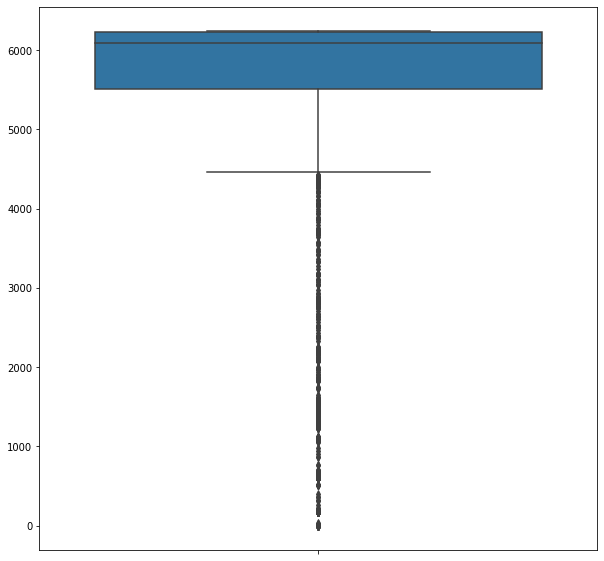

In [ ]:
black_nan = black.isna().sum().to_numpy()

plt.figure(figsize=(10, 10))

sns.boxplot(y=black_nan)

plt.show()

There are a significant number of columns with above 5000 NaN values which would not prove to be useful if we are exploring the black cases

In [ ]:
columns_to_drop = black.columns[np.where(black.isna().sum() > 5000)[0]]

df.drop(columns=columns_to_drop, inplace=True)

df.head()

,CASEID,V09154,V08825,V07477,V07292,V07297,V08249,V09346,V09218,V00233,V00234,V00684,V00688,V00685,V00686,V00687,V00690,V00691,V00692,V00694,V00695,V00696,V00698,V00708,V00709,V00699,V00705,V00706,V00707,V00715,V00716,V00717,V00718,V00719,V00720,V00712,V00713,V00714,V00722,V00727,...,V10058,V10059,V10063,V07874,V07828,V07881,V07852,V07898,V07837,V07842,V07644,V07490,V07689,V07698,V07574,V07534,V07555,V07657,V07645,V07535,V08533,V08510,V08545,V08521,V08392,V08276,V08452,V08329,V08393,V08382,V08320,V08322,V08328,NSALWTCT,NSALWTPN,NCNSWTSH,NCNSWTLG,NSNLWT,CPESWTSH,CPESWTLG
0,1,1.0,2.0,0,0,2,2,3.0,3.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15968.9517,11627.3949,14040.6279
1,2,1.0,2.0,0,0,1,1,3.0,3.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13858.6912,10090.8613,12185.1909
2,3,3.0,2.0,0,0,1,1,3.0,1.0,3.0,2.0,1.0,NaN,1.0,5.0,5.0,1.0,1.0,1.0,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13858.6912,10090.8613,12185.1909
3,4,1.0,9.0,0,0,2,2,0.0,0.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN,5.0,1.0,5.0,5.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7919.7406,5939.8017,6525.4160
4,5,1.0,6.0,0,0,1,1,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,NaN,1.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6096.5981,4572.4457,5023.2502


In [ ]:
import re

services_cols = []

filename = 'drive/My Drive/COSIW/services_IW.txt'

with open(filename) as f:
  all_lines = [line for line in f]
  services_cols = [re.findall("V\d{5}", line) for line in all_lines]
  services_cols = [col[0] for col in services_cols if len(col) > 0]
  


In [ ]:
print(services_cols)

['V02047', 'V02048', 'V02049', 'V02050', 'V02051', 'V02052', 'V02053', 'V02054', 'V02210', 'V02055', 'V02056', 'V02057', 'V02058', 'V02062', 'V02059', 'V02060', 'V02061', 'V02064', 'V02065', 'V02066', 'V02067', 'V02068', 'V02069', 'V02070', 'V02071', 'V02072', 'V02074', 'V02075', 'V02077', 'V02081', 'V02082', 'V02089', 'V02093', 'V02095', 'V02100', 'V02102', 'V02105', 'V02109', 'V02112', 'V02085', 'V02115', 'V02116', 'V02117', 'V02118', 'V02119', 'V02120', 'V02121', 'V02122', 'V02124', 'V02125', 'V02128', 'V02129', 'V02130', 'V02131', 'V02132', 'V02134', 'V02136', 'V02137', 'V02138', 'V02139', 'V02140', 'V02141', 'V02142', 'V02143', 'V02146', 'V02147', 'V02148', 'V02149', 'V02150', 'V02151', 'V02152', 'V02153', 'V02154', 'V02156', 'V02157', 'V02160', 'V02161', 'V02162', 'V02163', 'V02164', 'V02165', 'V02166', 'V02167', 'V02168', 'V02174', 'V02175', 'V02465', 'V02176', 'V02178', 'V02179', 'V02182', 'V02183', 'V02184', 'V02185', 'V02186', 'V02196', 'V02197', 'V02198', 'V02199', 'V02200',

In [ ]:
df_services = raw.copy(deep=True)

In [ ]:
df_services = df_services[services_cols]

In [ ]:
df_services.head(5)

,V02047,V02048,V02049,V02050,V02051,V02052,V02053,V02054,V02210,V02055,V02056,V02057,V02058,V02062,V02059,V02060,V02061,V02064,V02065,V02066,V02067,V02068,V02069,V02070,V02071,V02072,V02074,V02075,V02077,V02081,V02082,V02089,V02093,V02095,V02100,V02102,V02105,V02109,V02112,V02085,...,V02107,V02110,V02114,V02126,V02145,V02155,V02159,V02177,V02180,V02201,V02204,V02218,V02233,V02236,V02252,V02255,V02277,V02283,V02299,V02445,V02447,V02463,V02076,V02086,V02169,V02284,V02285,V02286,V02287,V02288,V02410,V02415,V02421,V02424,V02441,V02442,V02444,V02446,V02448,V02458
0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,5.0,2.0,24.0,5.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,36.0,1.0,104.0,5.0,NaN,NaN,NaN,1.0,39.0,5.0,NaN,NaN,4.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols_to_drop = df_services.columns[(df_services.isna().sum() > 10000)]

df_services.drop(columns=cols_to_drop, axis=1, inplace=True)

In [ ]:
df_services.fillna(value=0, inplace=True)

In [ ]:
# clustering on the PCA values of the services data

train_data = pd.get_dummies(data=df_services, columns=df_services.columns)
k_means = KMeans(n_clusters=3)
k_means.fit(train_data)
centers = k_means.cluster_centers_

pca = PCA(n_components=2)
pca.fit(X=train_data.to_numpy())

reduced_data = pca.transform(train_data.to_numpy())
reduced_centers = pca.transform(centers)

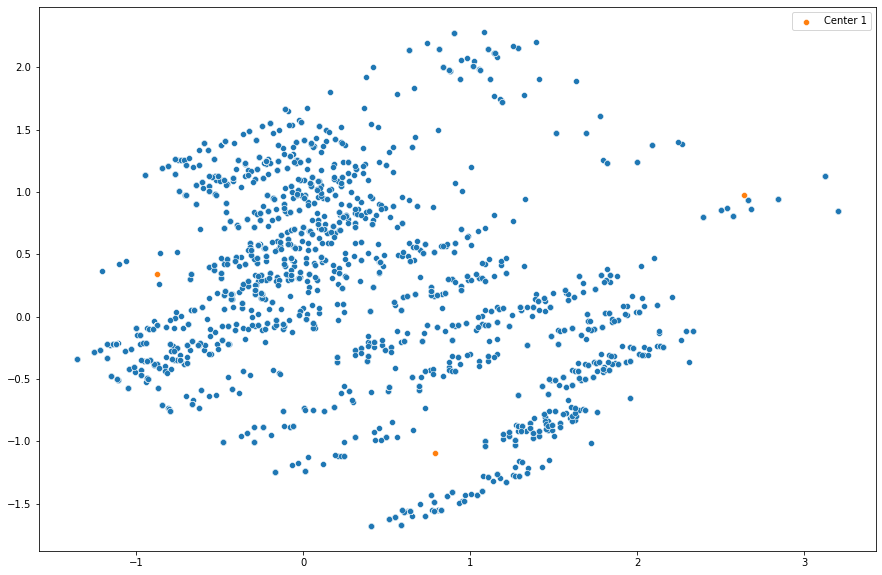

In [ ]:
plt.figure(figsize=(15, 10))

sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1])
sns.scatterplot(x=reduced_centers[:, 0], y=reduced_centers[:, 1], label="Center 1", markers="+")
# sns.scatterplot(x=reduced_centers[1, 0], y=reduced_centers[1, 1], label="Center 2")


plt.show()

In [ ]:
df_services.head(10)

,V02048,V02059,V02064,V02068,V02072,V02075,V02081,V02355,V02358,V02359,V02384,V02437
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,5.0,5.0
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,5.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,5.0,1.0,5.0
3,5.0,5.0,1.0,5.0,1.0,5.0,0.0,5.0,2.0,5.0,5.0,5.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
5,5.0,5.0,5.0,5.0,1.0,5.0,0.0,5.0,4.0,5.0,5.0,5.0
6,5.0,5.0,5.0,5.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,5.0
7,5.0,5.0,5.0,5.0,1.0,1.0,0.0,5.0,2.0,5.0,5.0,5.0
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,5.0,5.0,5.0
9,5.0,5.0,5.0,5.0,5.0,5.0,0.0,1.0,0.0,5.0,1.0,5.0


In [ ]:
# V02081 Seen professional for emotions/nerves/sub use in lifetime
# 1 = YES, 5 = NO

def OneHotEncode(df, col):
  
  items = df[col]
  for item in items:
    if item == 1.0:
      df[col] = 1
    else:
      df[col] = 0

#OneHotEncode(df_services, "V02081")

# MERGE THESE:

#V02064: Attend self-help group for emotions in lifetime
#V02068: Used hotline for problems with emotions/nerves
#V02072: Professional psych counsel or therapy for 30 min +
#V02081: Seen professional for emotions/nerves/sub use in lifetime


# PEOPLE THAT STOPED TREATMEMNT

# Saw mental health service

# V02124 Stopped seeing psychiatrist or ongoing treatment
# V02125 Completed psychiatrist treatment or quit
# V02142 Stopped seeing medical doctor or ongoing treatment
# V02143 Completed medical doctor treatment or quit
# V02156 Completed psychologist treatment or quit
# V02157 Completed psychologist treatment or quit
# V02179 Completed social worker treatment or quit
# V02200 Stopped seeing counselor or ongoing treatment
# V02215 Stopped seeing professional or ongoing treatment
# V02234 Stopped seeing non-MD health prof or ongoing treatment
# V02253 Stopped seeing spiritual advisor or ongoing treatment
# V02295 Stopped seeing healer or ongoing treatment


# REASONS

#V02336 Reason quit treatment-got better
#V02337 Reason quit treatment-did not need more help
#V02338 Reason quit treatment-not getting better
#V02339 Reason quit treatment-handle problems on own
#V02340 Reason quit treatment-bad exp w/ treatment providers
#V02341 Reason quit treatment-worry what people think
#V02342 Reason quit treatment-treated unfairly
#V02343 Reason quit treatment-therapist left
#V02344 Reason quit treatmt-felt out of place
#V02345 Reason quit treatment-policies were hassle
#V02346 Reason quit treatment-scheduling
#V02347 Reason quit treatment-you moved
#V02348 Reason quit treatment-expensive
#V02349 Reason quit treatment-insurance stop paying
#V02350 Reason quit treatment-family wanted stop
#V02351 Reason quit treatment-could not communicate
#V02352 Reason quit treatment-provider not comprehend probs
#V02353 Reason quit treatment-less attn because of race
#V02354 Reason quit treatment-other



In [ ]:
## reducing dimensions to measure stigma data

# V00995: Saw professional about sadness

valid_data = raw[~raw["V00995"].isna()].copy()
len(valid_data.columns)

5543

In [ ]:
cols_to_drop = valid_data.columns[(valid_data.isna().sum() > 100)]
valid_data.drop(columns=cols_to_drop, axis=1, inplace=True)
valid_data.fillna(value=0, inplace=True)

In [ ]:
valid_train = pd.get_dummies(data=valid_data, columns=valid_data.columns)
for col in valid_data.columns:
    print(valid_data[col].value_counts())

10239    1
19128    1
8909     1
15050    1
2760     1
        ..
17750    1
13652    1
1362     1
5583     1
4        1
Name: CASEID, Length: 3476, dtype: int64
1.0    2231
3.0    1010
2.0     221
0.0      14
Name: V09154, dtype: int64
0    2581
1     453
2     298
3     103
4      41
Name: V07477, dtype: int64
0    2949
1     398
2     108
3      21
Name: V07292, dtype: int64
1    1630
2    1377
3     343
4      96
5      29
0       1
Name: V07297, dtype: int64
1    1271
2     933
3     566
4     403
5     188
6      66
7      49
Name: V08249, dtype: int64
1.0    2420
5.0    1054
0.0       2
Name: V00684, dtype: int64
5.0    2101
1.0    1373
0.0       2
Name: V00685, dtype: int64
5.0    2235
1.0    1238
0.0       3
Name: V00686, dtype: int64
1.0    3228
5.0     248
Name: V00690, dtype: int64
1.0    3176
5.0     300
Name: V00691, dtype: int64
1.0    2828
5.0     645
0.0       3
Name: V00692, dtype: int64
5.0    2375
1.0    1096
0.0       5
Name: V00694, dtype: int64
1.0    2296
5.0   

In [ ]:
valid_data["V07306"].unique()

array([50, 32, 75, 19, 27, 39, 28, 46, 24, 25, 34, 48, 36, 51, 18, 33, 31,
       43, 44, 26, 49, 45, 30, 35, 77, 62, 42, 29, 52, 54, 40, 22, 53, 20,
       41, 66, 37, 23, 38, 58, 55, 65, 47, 71, 78, 70, 67, 21, 64, 82, 61,
       60, 57, 56, 76, 59, 81, 63, 74, 69, 72, 80, 73, 68, 83, 79, 91, 85,
       86, 89, 87, 88, 84], dtype=int16)

In [ ]:
pd.cut(x=valid_data["V07306"], bins=[18, 35, 45, 80], labels=["<=35", "35-45", "45-80"])

3        45-80
6         <=35
9        45-80
11       45-80
24        <=35
         ...  
19916    45-80
19936     <=35
19978     <=35
19994    35-45
20002    35-45
Name: V07306, Length: 3476, dtype: category
Categories (3, object): ['<=35' < '35-45' < '45-80']

In [ ]:
valid_data.loc[:, valid_data.nunique() > 5]

,CASEID,V07297,V08249,V00911,V07306,V08813,V08814,V08812,V08818,V08815,V08823,V00229,V09413,V03085,V09414,RANCEST,SESTRAT,V08683,V08930,CPESCASE,CPESWTSH,CPESWTLG
3,4,2,2,3.0,50,0.000000,0.000000,0.000000,0.0,0.000000,3.0,155.0,0.0,16.0,8.0,6,112,200000.0,17.0,11751,5939.8017,6525.4160
6,7,1,1,3.0,32,0.000000,0.000000,0.000000,0.0,0.000000,2.0,114.0,0.0,17.0,10.0,7,112,174999.0,17.0,9695,8750.0762,10576.2640
9,10,3,3,5.0,50,0.000000,0.000000,0.000000,0.0,0.000000,3.0,149.0,2.0,14.0,8.0,6,113,125000.0,9.0,9916,6523.0169,6774.8709
11,12,1,1,2.0,75,0.000000,75.000000,0.000000,0.0,100.000000,4.0,170.0,3.0,8.0,7.0,8,113,8500.0,1.0,9503,9206.4326,10521.6373
24,25,1,1,3.0,19,0.000000,0.000000,0.000000,0.0,0.000000,2.0,135.0,0.0,12.0,14.0,4,113,38100.0,4.0,13694,12958.4316,15647.9174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,19917,4,4,4.0,62,0.000000,0.000000,0.000000,0.0,0.000000,3.0,220.0,0.0,9.0,13.0,9,72,79000.0,4.0,14928,1421.3111,1421.3111
19936,19937,1,5,2.0,30,0.000000,0.000000,0.000000,0.0,0.000000,2.0,140.0,0.0,12.0,8.0,8,72,16900.0,1.0,15293,1027.7573,1027.7573
19978,19979,3,3,4.0,24,0.000000,1.111111,0.000000,0.0,1.666667,2.0,160.0,0.0,13.0,5.0,8,72,62500.0,5.0,16060,3731.2092,3731.2092
19994,19995,5,7,2.0,42,43.750000,58.333333,6.944444,0.0,100.000000,3.0,200.0,6.0,13.0,9.0,9,72,65000.0,2.0,18505,1133.6284,1133.6284


In [ ]:
# columns with continuous values: V08813, V08814, V08812, V08815, V00229, V08683

# SESTRAT, CPESCASE, CPESWTSH, CPESWTLG

stats_cols = ['SESTRAT', 'CPESCASE', 'CPESWTSH', 'CPESWTLG']
valid_data.drop(columns=stats_cols, axis=1, inplace=True)


WHODAS scores: These patient assessment measures were developed to be
administered at the initial patient interview and to monitor treatment progress.
They should be used in research and evaluation as potentially useful tools to
enhance clinical decision-making and not as the sole basis for making a clinical
diagnosis

In [ ]:
# V08815, V08818, V08814, V08813
# V08812

pd.cut(x=valid_data["V08815"], bins=[0, 25, 50, 75, 100], labels=["<=25", "25-50", "50-75", ">=75"], include_lowest=True)
pd.cut(x=valid_data["V08818"], bins=[0, 25, 50, 75, 100], labels=["<=25", "25-50", "50-75", ">=75"], include_lowest=True)
pd.cut(x=valid_data["V08814"], bins=[0, 25, 50, 75, 100], labels=["<=25", "25-50", "50-75", ">=75"], include_lowest=True)
pd.cut(x=valid_data["V08813"], bins=[0, 25, 50, 75, 100], labels=["<=25", "25-50", "50-75", ">=75"], include_lowest=True)


3         <=25
6         <=25
9         <=25
11        <=25
24        <=25
         ...  
19916     <=25
19936     <=25
19978     <=25
19994    25-50
20002     <=25
Name: V08813, Length: 3476, dtype: category
Categories (4, object): ['<=25' < '25-50' < '50-75' < '>=75']

In [ ]:
valid_data.loc[:, valid_data.nunique() > 5]

,CASEID,V07297,V08249,V00911,V07306,V08813,V08814,V08812,V08818,V08815,V08823,V00229,V09413,V03085,V09414,RANCEST,V08683,V08930
3,4,2,2,3.0,50,0.000000,0.000000,0.000000,0.0,0.000000,3.0,155.0,0.0,16.0,8.0,6,200000.0,17.0
6,7,1,1,3.0,32,0.000000,0.000000,0.000000,0.0,0.000000,2.0,114.0,0.0,17.0,10.0,7,174999.0,17.0
9,10,3,3,5.0,50,0.000000,0.000000,0.000000,0.0,0.000000,3.0,149.0,2.0,14.0,8.0,6,125000.0,9.0
11,12,1,1,2.0,75,0.000000,75.000000,0.000000,0.0,100.000000,4.0,170.0,3.0,8.0,7.0,8,8500.0,1.0
24,25,1,1,3.0,19,0.000000,0.000000,0.000000,0.0,0.000000,2.0,135.0,0.0,12.0,14.0,4,38100.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,19917,4,4,4.0,62,0.000000,0.000000,0.000000,0.0,0.000000,3.0,220.0,0.0,9.0,13.0,9,79000.0,4.0
19936,19937,1,5,2.0,30,0.000000,0.000000,0.000000,0.0,0.000000,2.0,140.0,0.0,12.0,8.0,8,16900.0,1.0
19978,19979,3,3,4.0,24,0.000000,1.111111,0.000000,0.0,1.666667,2.0,160.0,0.0,13.0,5.0,8,62500.0,5.0
19994,19995,5,7,2.0,42,43.750000,58.333333,6.944444,0.0,100.000000,3.0,200.0,6.0,13.0,9.0,9,65000.0,2.0


In [ ]:
## DEMOGRAPHIC INFO

# V07306: Age, V08823: Obesity-recode of BMI, V00229: Weight in pounds
# V09413: number of other living children incl step/adopt/raised 5+ years:Top Code
# V03085: Highest grade of school/college completed: Top/Bot Code
# V08683: Household Income : Topcode, V08930: Census 2001 income-to-needs ratio: hhinc/povthre

## WHODAS SCORES

# V08813: WHODAS cognitive score, V08814: WHODAS mobility score, V08812: WHODAS self-care score
# V08818: WHODAS social interaction score, V08815: WHODAS time out of role score
# V08815: WHODAS time out of role score


